# Now is better than never

- Don't spend too much time planning and pre-optimising

In [1]:
import networkx as nx
import re
%matplotlib inline

In [2]:
def bel2dict(statement):
    pattern_def = '^(?P<subject_activity>\w+)*\(*(?P<subject_abundance_type>\w+)\((?P<subject_namespace>\w+)\:(?P<subject_protein>\w+)\)\)*\s+(?P<relation_type>[\w\W]+)\s+(?P<object_activity>\w+)*\(*(?P<object_abundance_type>\w+)\((?P<object_namespace>\w+)\:(?P<object_protein>\w+)\)\)*$'
    pattern = re.compile(pattern_def)
    if pattern.match(statement) is not None:
        dct_regex_eval = pattern.match(statement).groupdict()
        return dct_regex_eval

In [3]:
statements_to_graph = [
    'kin(p(HGNC:PIK3CA)) increases p(HGNC:AKT1)',
    'kin(p(HGNC:PIK3CA)) increases p(HGNC:AKT2)',
    'kin(p(HGNC:PIK3CA)) increases p(HGNC:AKT1)',
    'p(HGNC:AKT1) positiveCorrelation p(HGNC:AKT2)',
    'p(HGNC:AKT2) increases p(HGNC:GSK3B)',
]

In [4]:
dg_bel = nx.DiGraph()
for statement in statements_to_graph:
    current_dct = bel2dict(statement)
    for i in ['subject', 'object']:
        dg_bel.add_node(current_dct['{}_protein'.format(i)],activity=current_dct['{}_activity'.format(i)],ab_type=current_dct['{}_abundance_type'.format(i)])
    dg_bel.add_edge(current_dct['subject_protein'], current_dct['object_protein'], relation=current_dct['relation_type'])

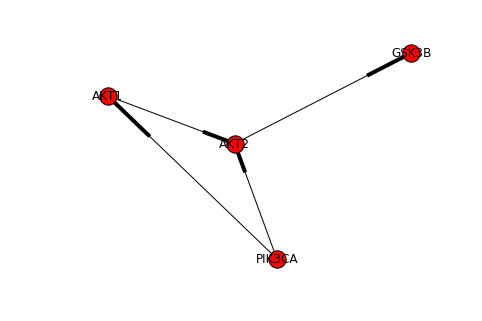

In [5]:
nx.draw(dg_bel, with_labels=True)